## EDA and Feature Engineering of Google Play Store Dagaset
* 1. **Problem Statement :**<br>
Today, 1.85 million apps are available for users to Download.<br>
Android users have even more from which to choose, with 2.56 million available through the Google Play Store.<br>
These apps have come to play a huge role in the way we live our lives today.<br>
Our Object is to find the most  popular category, Find the app  with larhest number of installs, the with largest size etc.

* 2. **Data Collection**<br>
The Data Consists of 20 columns and 10841 rows

### the Steps we are going to follow 
1. Data Cleaning
2. Exploratory Data Analysis
3. Feature Enginneering

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
df = pd.read_csv('googleplaystore.csv')

In [87]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [88]:
df.shape

(10841, 13)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [90]:
### statistical Summary
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [91]:
### find missing value
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Insights And Observations
The Dataset have missing values

In [92]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## 1. Handling Reviews of Df

In [93]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [94]:
## check How many REvies are Numeric

df['Reviews'].count()

np.int64(10841)

In [95]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [96]:
### since 10840 reviews are numeric type and toatal 10841 is total reviews

## hence 1 review is non numeric

## let's find this  non-numeric record 

df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [97]:
### we can delete/drop the rows also 


### df = df.drop(index=df.index(10472))

In [98]:
## instead of delete we convert into numeric form

df['Reviews'] = df['Reviews'].apply(lambda x : x.replace('.0M', '000000'))

In [99]:
df[~df['Reviews'].str.isnumeric()]    ## now again check after Coverting '3.0M' into 3000000

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [100]:
df['Reviews'].str.isnumeric().sum()  ### now all record is in numeric form

np.int64(10841)

In [101]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


In [102]:
### convert Reviews column into int type

df['Reviews'] = df['Reviews'].astype(int)

In [103]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10841 non-null  int64
dtypes: int64(1)
memory usage: 84.8 KB


In [104]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### 2. Handling Size(in M=MB or k=kb) of DF

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [106]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [107]:
## change M with 000k and k with ''"1-Red Wine Dataset EDA.ipynb"
import numpy as np
def size_conversion(x):
    x = str(x).replace('.', '').strip()
    try:
        if x.endswith('M'):
            return float(x[:-1])*1000
        elif x.endswith('k'):
            return float(x[:-1])
        else:
            return np.nan   ## for this type of value 'Varies with device'
    except:
        return np.nan


In [108]:
df['Size_k'] = df['Size'].apply(size_conversion)

In [109]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0


In [110]:
df[['Size', 'Size_k']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Size    10841 non-null  object 
 1   Size_k  9145 non-null   float64
dtypes: float64(1), object(1)
memory usage: 169.5+ KB


In [111]:
df[['Size', 'Size_k']]

,Size,Size_k
0,19M,19000.0
1,14M,14000.0
2,8.7M,87000.0
3,25M,25000.0
4,2.8M,28000.0
...,...,...
10836,53M,53000.0
10837,3.6M,36000.0
10838,9.5M,95000.0
10839,Varies with device,NaN


In [112]:
df[df['Size_k'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,NaN
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,NaN
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,NaN
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,NaN
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,NaN
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,NaN
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,NaN


In [113]:
df.drop('Size', axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Size_k          9145 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


### 3. Installs column of df

In [115]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [116]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [117]:
char_to_remove = ['+', ',', '$']
columns_to_clean = ['Installs', 'Price']

for item in char_to_remove:
    for col in columns_to_clean:
        df[col] = df[col].str.replace(item, '')

In [118]:
## now check
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [119]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [120]:
df['Installs'].str.isnumeric().sum()

np.int64(10840)

In [121]:
df['Installs'].astype(int)  ### change from object tyoe to int type

ValueError: invalid literal for int() with base 10: 'Free'

In [122]:
### since one value is not numeric form
## find those value 
df[~df['Installs'].str.isnumeric()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [123]:
### there is one non-numeric value 'Free' inatr the index 10472 so remove this row

df.drop(index=10472, inplace=True)
##  after drop rest index also(optional)
df.reset_index(drop=True, inplace=True)

In [124]:
## check again
df[~df['Installs'].str.isnumeric()]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k


In [125]:
## now change Installs data type into int
df['Installs'] = df['Installs'].astype(int)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Installs        10840 non-null  int64  
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Size_k          9145 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [127]:
df['Price'] = df['Price'].astype(float)

In [128]:
### "Everyone" gives error so drop it 
df[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k


In [129]:
### drop this single row

df = df[df['Price']!='Everyone']

In [130]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [131]:
## now change into float datatype

df['Price'] = df['Price'].astype(float)

In [132]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10840 entries, 0 to 10839
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Installs        10840 non-null  int64  
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Size_k          9145 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [134]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_k
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,28000.0


In [135]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

### 4. Last Update column of df

In [136]:
### convert into dateTime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

df['Last Updated Day'] = df['Last Updated'].dt.day
df['Last Updated Month'] = df['Last Updated'].dt.month
df['Last Updated Year'] = df['Last Updated'].dt.year

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 10840 non-null  object        
 1   Category            10840 non-null  object        
 2   Rating              9366 non-null   float64       
 3   Reviews             10840 non-null  int64         
 4   Installs            10840 non-null  int64         
 5   Type                10839 non-null  object        
 6   Price               10840 non-null  float64       
 7   Content Rating      10840 non-null  object        
 8   Genres              10840 non-null  object        
 9   Last Updated        10840 non-null  datetime64[ns]
 10  Current Ver         10832 non-null  object        
 11  Android Ver         10838 non-null  object        
 12  Size_k              9145 non-null   float64       
 13  Last Updated Day    10840 non-null  int32     

In [138]:
## drop the Last Updated
df.drop('Last Updated', axis=1, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Installs            10840 non-null  int64  
 5   Type                10839 non-null  object 
 6   Price               10840 non-null  float64
 7   Content Rating      10840 non-null  object 
 8   Genres              10840 non-null  object 
 9   Current Ver         10832 non-null  object 
 10  Android Ver         10838 non-null  object 
 11  Size_k              9145 non-null   float64
 12  Last Updated Day    10840 non-null  int32  
 13  Last Updated Month  10840 non-null  int32  
 14  Last Updated Year   10840 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory u

In [140]:
### now save the one copy of this datasets

df.to_csv('Data/GooglepalyStore_Cleaned_Data.csv')

### Now Performin EDA

In [141]:
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_k,Last Updated Day,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19000.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14000.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,87000.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,25000.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,28000.0,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,53000.0,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.0,Everyone,Education,1.0,4.1 and up,36000.0,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,95000.0,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,NaN,19,1,2015


In [142]:
## check Duplicated rows

df.duplicated('App').sum()

np.int64(1181)

In [143]:
### now drop all the Duplicated item

df.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [144]:
df.shape

(9659, 15)

### Explore Data

In [145]:
## numeric Feature
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
## categorical feature
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns
print('we have {} numerical features : {}'.format(len(numeric_feature), numeric_feature))
print('we have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

we have 8 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'Size_k', 'Last Updated Day', 'Last Updated Month', 'Last Updated Year']
we have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## feature Information

1. **App** : Name of the App.
2. **Category** : Category under which the All falls.
3. **Rating** : Application ration of Play Store.
4. **Size** : Size of the App (M 0r k)
5. **Reviews** : Number of views of the App.
6. **Installs** : Number of the install of the app.
7. **Type** : The app is free or paid
8. **Price** : Price of the App(0 if it is free)
9. **Content** Rating : Appropriate Target Audience Of the app.
10. **Generes** : Genere under which the app falls
11. **Last Updated** : When the app was Updated
12. **Current Ver** : Current vversion of gthe app.
13. **Android Ver** : Minimum Android Version requiresd to run App.

In [146]:
## proportion of cound Data on Categorical columns

for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTI

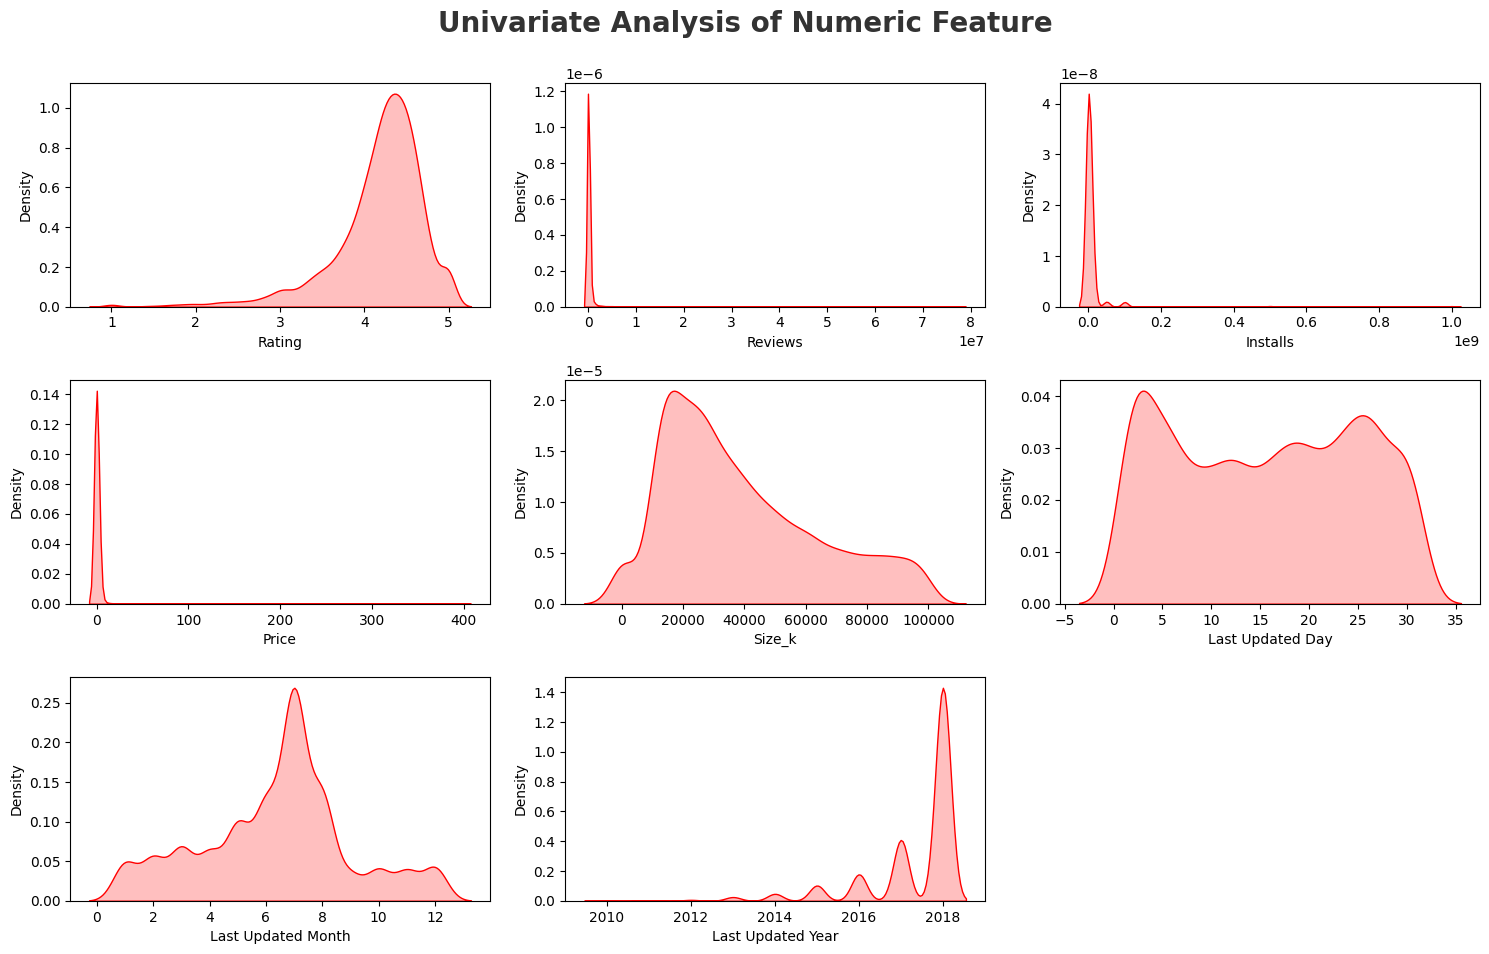

In [147]:
### proportion of counts data on categorical columns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numeric Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_feature[i]], shade=True, color='r') ### they show the distribution of a continuous variable.
    plt.xlabel(numeric_feature[i])   
    plt.tight_layout()   ### Adjusts spacing between subplots to avoid overlap.

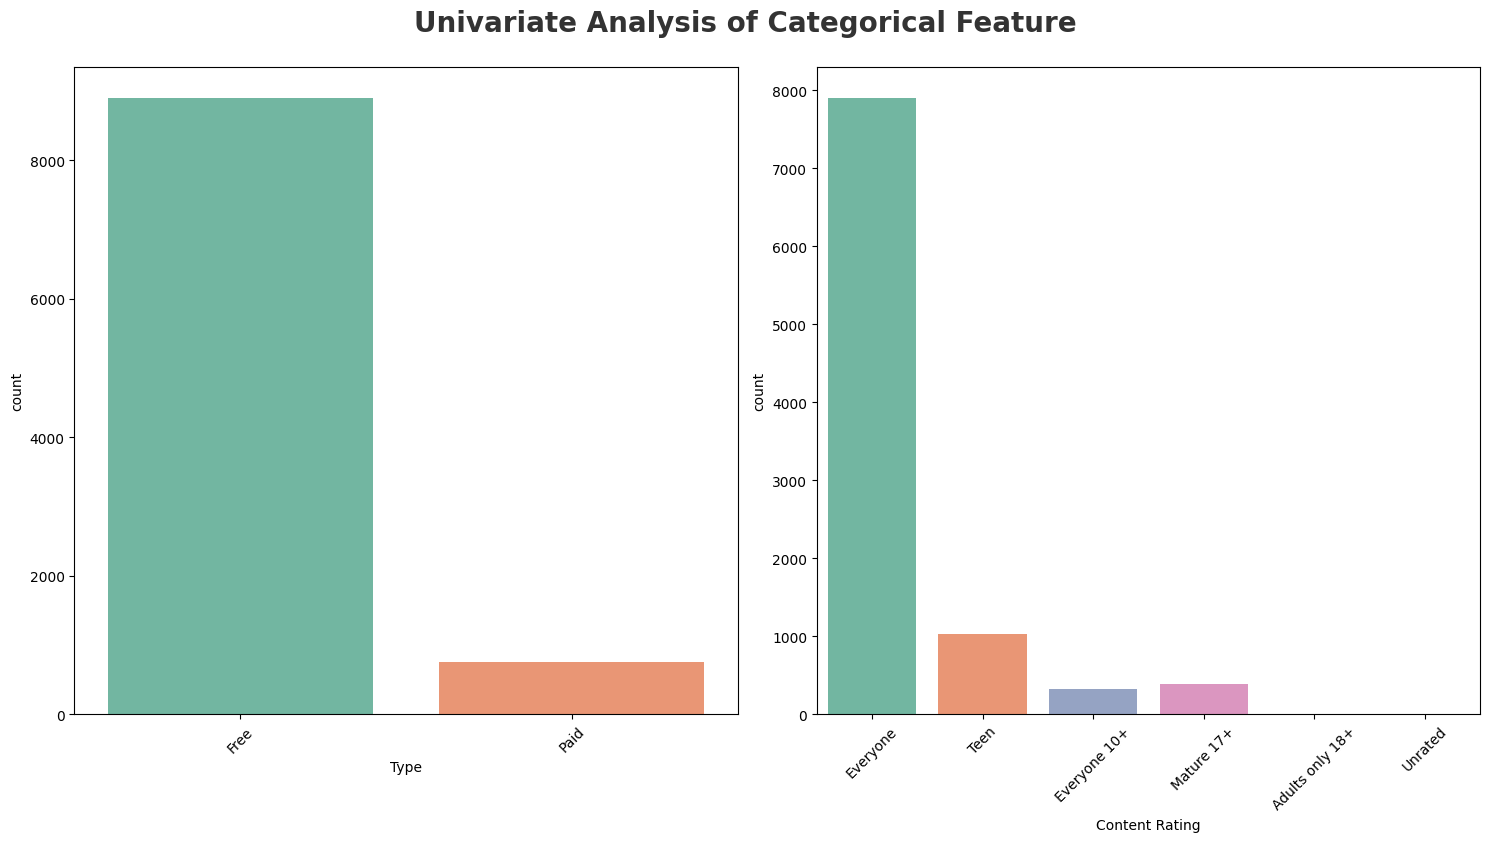

In [148]:
### Categorical column 

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


### which is the most popular App Category ???

<Axes: ylabel='count'>

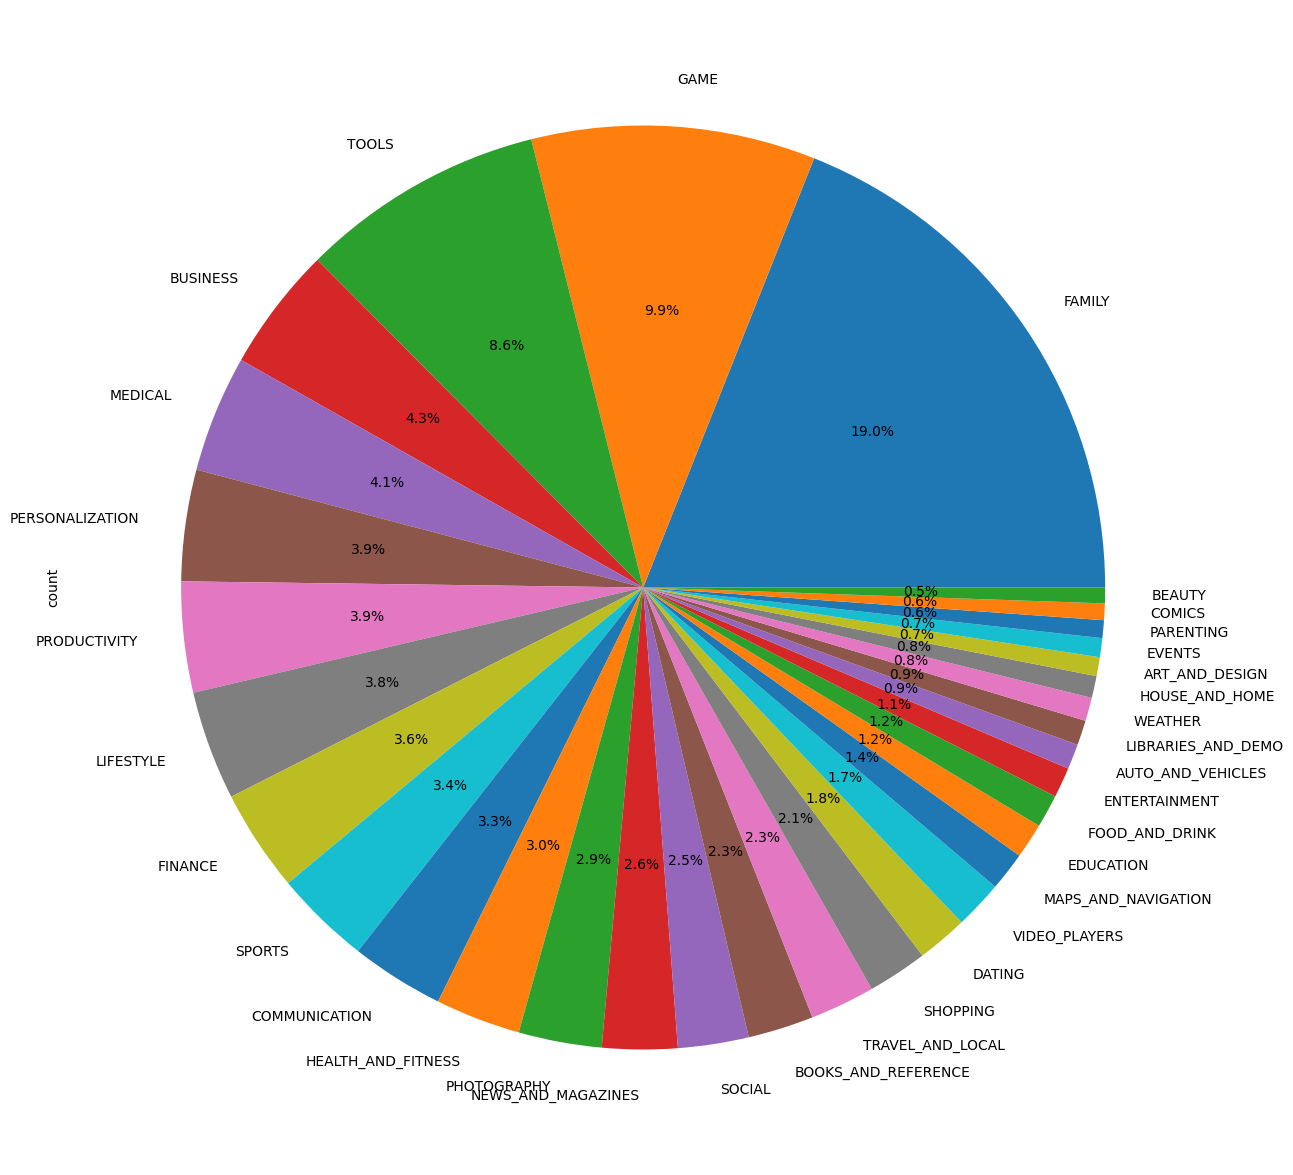

In [166]:
df['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15, 15), autopct='%1.1f%%')

### Observation
1. There are more kind of apps in playstore which are under category of family games and tool
2. beauty, comics, art and weather kind of app are very less in playstore

In [192]:
df.head(2)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Size_k,Last Updated Day,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,19000.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,14000.0,15,1,2018


In [215]:
cate_data_series = df['Category'].value_counts()

type(cate_data_series)

pandas.core.series.Series

In [222]:
### top 10 App Categories

category_App = pd.DataFrame(cate_data_series)
category_App.reset_index(inplace=True)
display(category_App.head(10))

,Category,count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


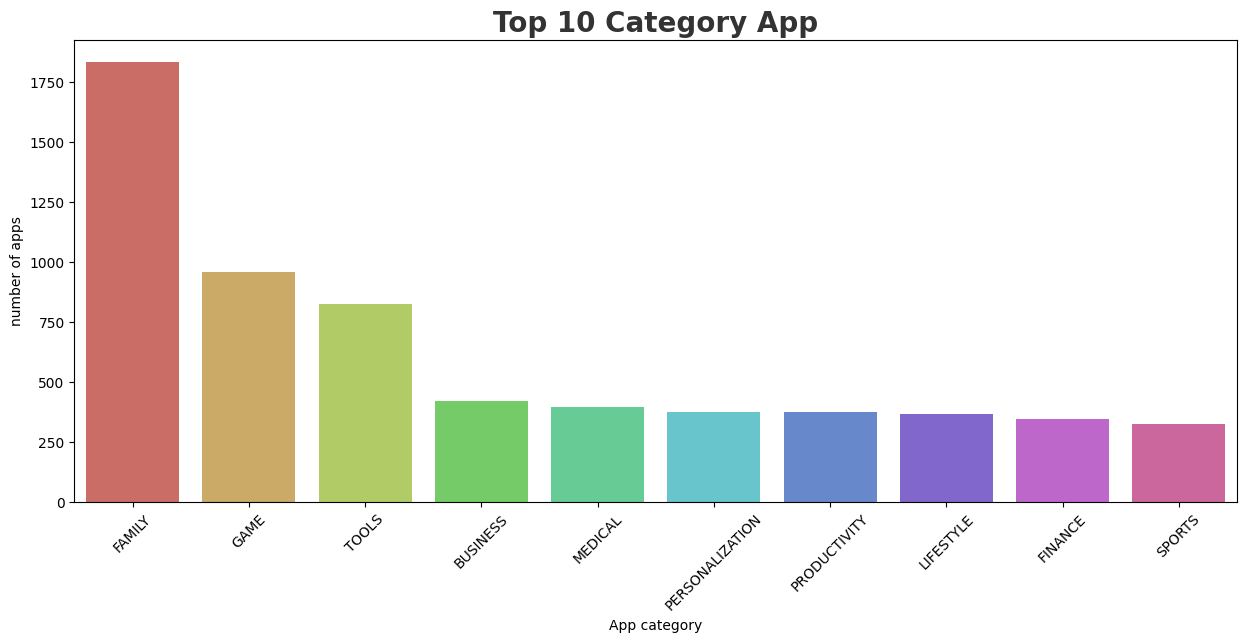

In [226]:
## bar plot of the Top 10 Category App

plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='count', data=category_App[:10] ,palette='hls')
plt.title('Top 10 Category App', fontsize=20, fontweight='bold', alpha=0.8)
plt.xlabel("App category")
plt.ylabel("number of apps")
plt.xticks(rotation=45)
plt.show()